<a href="https://colab.research.google.com/github/Mufabo/robustsp/blob/master/examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [1]:
!pip install git+https://github.com/Mufabo/robustsp

  Cloning https://github.com/Mufabo/robustsp to /tmp/pip-req-build-o5kkjo7t
  Running command git clone -q https://github.com/Mufabo/robustsp /tmp/pip-req-build-o5kkjo7t
  Created wheel for robustsp: filename=robustsp-0.1.1-cp37-none-any.whl size=1878963 sha256=bc6c37a60155d038c64284bde9530c62787a6bc7a038c7775efe46bfe87341d0
  Stored in directory: /tmp/pip-ephem-wheel-cache-n9zkh1no/wheels/bf/ef/3d/0ac54f1ee8ef77de8e42d28033e61795079ebf49f3b5f6223c
Successfully built robustsp


# 01 Location and Scale

## Sensitivity Curve Location

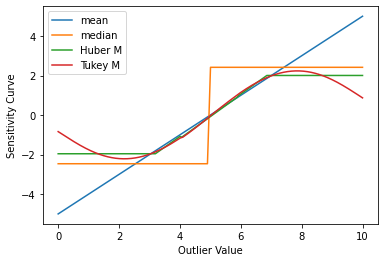

In [ ]:
import numpy as np
import robustsp as rsp
import matplotlib.pyplot as plt
import warnings

# Usually a bad idea, this is just to avoid cluttering the output
warnings.filterwarnings("ignore")

np.random.seed(123)
# number of measurements
N = 100;    
# DC voltage in AWGN
x_N_minus1 = np.random.randn(N-1,1)+5;    
# outlier values
delta_x = np.linspace(0,10,1000);

# sensitivity curve for mean
SC_mean = np.zeros(len(delta_x));
mu_hat = np.mean(x_N_minus1);
for ii in range(len(delta_x)):
    SC_mean[ii] = N*(np.mean(np.append(x_N_minus1, delta_x[ii]))-mu_hat)


# sensitivity curve for median
SC_med = np.zeros(len(delta_x))
mu_hat = np.median(x_N_minus1)
for ii in range(len(delta_x)):
    SC_med[ii] = N*(np.median(np.append(x_N_minus1, delta_x[ii]))-mu_hat)


# sensitivity curve for Huber's location estimator
c =  1.3415;
SC_hub = np.zeros(len(delta_x));
mu_hat = rsp.MLocHUB(x_N_minus1,c);
for ii in range(len(delta_x)):
    SC_hub[ii] = N*(rsp.MLocHUB(np.append(x_N_minus1, delta_x[ii]))-mu_hat)

# sensitivity curve for Tukey's location estimator
c = 4.68; 
SC_tuk = np.zeros(len(delta_x));
mu_hat = rsp.MLocTUK(x_N_minus1,c);
for ii in range(len(delta_x)):
    SC_tuk[ii] = N*(rsp.MLocTUK(np.append(x_N_minus1, delta_x[ii]))-mu_hat)

plt.plot(delta_x, SC_mean-np.mean(SC_mean))
plt.plot(delta_x, SC_med-np.mean(SC_med))
plt.plot(delta_x, SC_hub-np.mean(SC_hub))
plt.plot(delta_x, SC_tuk-np.mean(SC_tuk))
plt.xlabel('Outlier Value')
plt.ylabel('Sensitivity Curve')
leg = plt.legend(('mean', 'median', 'Huber M', 'Tukey M'))

## Sensitivity Curve Scale

In [ ]:
import numpy as np
import robustsp as rsp
import matplotlib.pyplot as plt
import warnings

# Usually a bad idea, this is just to avoid cluttering the output
warnings.filterwarnings("ignore")

np.random.seed(123)
# number of measurements
N = 100;    
# DC voltage in AWGN
x_N_minus1 = np.random.randn(N-1,1)+5;    
# outlier values
delta_x = np.linspace(0,10,1000);

# sensitivity curve for standard deviation
SC_std = np.zeros(len(delta_x));
std_hat = np.std(x_N_minus1, ddof=1);
for ii in range(len(delta_x)):
    SC_std[ii] = N*(np.std(np.append(x_N_minus1, delta_x[ii]), ddof=1)-std_hat)


# Sensitivity Curve for median absolute deviation
# that does not coverge to IF
SC_mad = np.zeros(len(delta_x))
std_hat = rsp.madn(x_N_minus1)
for ii in range(len(delta_x)):
    SC_mad[ii] = N*(rsp.madn(np.append(x_N_minus1, delta_x[ii]))-std_hat)


# Sensitivity Curve for mean absolute deviation
# around the median
SC_mead = np.zeros(len(delta_x));
std_hat = np.mean(np.abs(x_N_minus1-np.median(x_N_minus1)));
for ii in range(len(delta_x)):
    SC_mead[ii] = N*(np.mean(np.append(x_N_minus1, delta_x[ii])-np.median(x_N_minus1))-std_hat)

# Sensitivity Curve for Huber's scale estimate
c =  1.3415
SC_hub = np.zeros(len(delta_x))
std_hat = rsp.MscaleHUB(x_N_minus1, c)
for ii in range(len(delta_x)):
    SC_hub[ii] = N*(np.mean(rsp.MscaleHUB(np.append(x_N_minus1, delta_x[ii]), c))-std_hat)


# sensitivity curve for Tukey's scale estimator
c = 4.68; 
SC_tuk = np.zeros(len(delta_x));
std_hat = rsp.MscaleTUK(x_N_minus1,c);
for ii in range(len(delta_x)):
    SC_tuk[ii] = N*(rsp.MscaleTUK(np.append(x_N_minus1, delta_x[ii]),c)-std_hat)



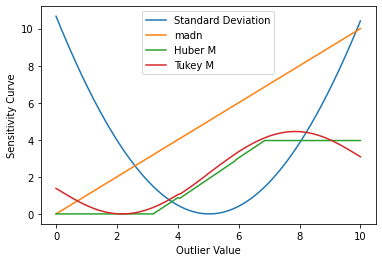

In [ ]:
plt.plot(delta_x, SC_std-np.min(SC_std))
plt.plot(delta_x, SC_mead-np.min(SC_mead))
plt.plot(delta_x, SC_hub-np.min(SC_hub))
plt.plot(delta_x, SC_tuk-np.min(SC_tuk))

plt.xlabel('Outlier Value')
plt.ylabel('Sensitivity Curve')
leg = plt.legend(('Standard Deviation', 'madn', 'Huber M', 'Tukey M'))


# 02 Regression

## Image Example

rankflasso: starting iterations

rankflasso: starting iterations



(-18.950000000000003, 419.95, -0.15000000000000002, 3.15)

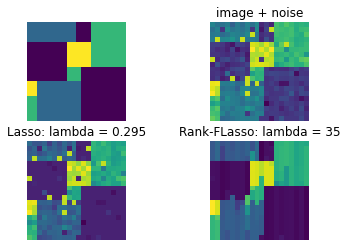

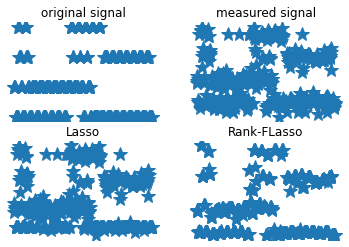

In [5]:
import robustsp as rsp
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io
import pkg_resources
import warnings
warnings.filterwarnings("ignore")

# Read image of sqares (20 x 20 pixels)
path = pkg_resources.resource_filename('robustsp', 'data/images.mat') 
# contains the vectors y20 (clean data) and y20n (noisy data)
img = scipy.io.loadmat(path,struct_as_record=False)
y20 = img['y20']
y20n = img['y20n']
n = len(y20)
scaledata1 = lambda x: 3*(x-np.min(x)) / (np.max(x) - np.min(x))
scaledata2 = lambda x: 3*(x-np.min(x,axis=1)[:,None]) / (np.max(x,axis=1) - np.min(x,axis=1))[:,None]

# Plot the image
fig0 = plt.figure(0)
plt.title('Original Image')
plt.subplot(2,2,1)
plt.imshow(np.reshape(y20,(int(np.sqrt(n)),int(np.sqrt(n))),order="F"),
              interpolation='none')

plt.axis('off')

# Plot the image + noise
plt.subplot(2,2,2)
plt.imshow(np.reshape(y20n,(int(np.sqrt(n)),int(np.sqrt(n))),order="F"),
              interpolation='none')
plt.title('image + noise')
plt.axis('off')

# Plot the signal
fig1 = plt.figure(1)
plt.subplot(2,2,1)
plt.plot(range(1,n+1), y20,'*',ms=14)
plt.title('original signal')
plt.axis('off')

# Plot the noisy (measured) signal
plt.subplot(2,2,2)
plt.plot(range(1,n+1), scaledata1(y20n),'*',ms=14)
plt.title('measured signal')
plt.axis('off')
# --- Compute the LASSO solution ---

L = 20 # Grid size
Blas20n, stats = rsp.enetpath(y20n, np.eye(n), 1, L,10**-3,False)
Blas20n = Blas20n[:,1:] # Get rid of the all-zeros first column 

# Choose the best LASSO solution
ero = scaledata2(Blas20n.T).T - y20
MSElasso = np.min(np.sum(ero**2,axis=0))
indx = np.argmin(np.sum(ero**2,axis=0)) # should b 6
Blas = Blas20n[:,indx] # the best lasso solution
lam_las = stats['Lambda'][indx+1] # the best lambda value


plt.figure(0)
plt.subplot(2,2,3)
plt.imshow(np.reshape(Blas, (20, 20), order="F"),
              interpolation='none')
plt.title('Lasso: lambda = %.3f' % lam_las)
plt.axis('off')

plt.figure(1)
plt.subplot(2,2,3)
plt.plot(range(1,n+1), scaledata1(Blas),'*',ms=14)
plt.title('Lasso')
plt.axis('off')
# --- Compute the Rank-FLasso solution ---

# start with some initial values of lambda1 and lambda2
lambda2 = 340
lambda1 = 124

B1 = rsp.rankflasso(y20n,np.eye(n),lambda1,lambda2,Blas,1)[0]
MSE_rank1 = np.sum((scaledata1(B1)-y20n)**2)

# adjust the parameters
lambda2 = 420
lambda1 = 35

B2 = rsp.rankflasso(y20n.flatten(), np.eye(400),lambda1,lambda2,B1,1)[0]
MSE_rank2 = np.sum((scaledata1(B2)-y20n)**2)

plt.figure(0)
plt.subplot(2,2,4)
plt.imshow(np.reshape(B2, (20, 20), order="F"),
              interpolation='none')
plt.title('Rank-FLasso: lambda = %i' % lambda1)
plt.axis('off')

plt.figure(1)
plt.subplot(2,2,4)
plt.plot(range(1,n+1), scaledata1(B2),'*',ms=14)
plt.title('Rank-FLasso')
plt.axis('off')

# Prostate Analysis

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


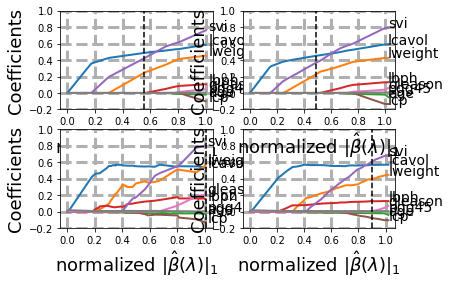

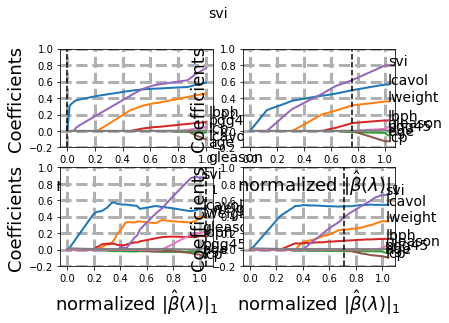

In [2]:
import robustsp as rsp
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io
import pkg_resources
import warnings
warnings.filterwarnings("ignore")

path = pkg_resources.resource_filename('robustsp', 'data/prostate.mat')
names = scipy.io.loadmat(path,struct_as_record=False)['names'][0]
names = [i for i in zip(*names)][0]

X = scipy.io.loadmat(path,struct_as_record=False)['X']
y = scipy.io.loadmat(path,struct_as_record=False)['y']
n,p = X.shape

#############   LASSO   ############

B,stats = rsp.enetpath(y,X,1)

k = np.nanargmin(stats['BIC']) # ,29 , 30 in matlab
blas = np.copy(B[:,k]) # LASSO BIC solution 
bmaxlas = np.sum(np.abs(B[1:,-1])) # largest value of || \beta ||_1, 2.0733

# plot LASSO

locs = np.copy(B[1:,-1])
locs[2] = locs[2] - 0.025 # 'age' is too close, so put it down
locs[6] = locs[6] + 0.01
loc_x = np.sum(np.abs(blas[1:-1])) / bmaxlas
xx = np.sum(np.abs(B[1:,:]),axis=0)/bmaxlas # slightly different from Matlab version
Y = B[1:,:]
fig1 = plt.figure(0)
plt.subplot(221)
rsp.prostate_plot_setup(xx,Y,locs,loc_x,names)
fig1.show()

###############   LAD-LASSO   ################

Blad,statslad = rsp.ladlassopath(y,X,reltol=1e-7)
ladind = np.nanargmin(statslad['gBIC'])
blad = Blad[:,ladind] # LAD-Lasso BIC solution
bmaxlad = np.max(np.sum(np.abs(Blad[1:,:]),axis=0)) # largest solution || \beta ||_1

# Plot LAD-LASSO
plt.subplot(223)
locs = Blad[1:,-1] # stellenweise andars als matlab 
locs[1] = locs[1] + 0.02 # lweight up
locs[6] = locs[6] + 0.02 # gleason up
locs[3] = locs[3] - 0.02 # age down
loc_x = np.sum(np.abs(blad[1:])) / bmaxlad
xx = np.sum(np.abs(Blad[1:,:]),axis=0)/bmaxlad 
Y = Blad[1:,:]
rsp.prostate_plot_setup(xx,Y,locs,loc_x,names)
fig1.show()

############   Rank-LASSO   ############

Brlad, _, statsrlad = rsp.ranklassopath(y,X)
rladind = np.nanargmin(statsrlad['gBIC'])
brlad = Brlad[:,rladind]
bmaxrlad = np.max(np.sum(np.abs(Brlad),axis=0))

# Plot Rank-LASSO
plt.subplot(224)
locs = Brlad[:,-1] # stellenweise andars als matlab 
locs[6] = locs[6] + 0.02 # gleason up
locs[2] = locs[2] - 0.02 # age down
loc_x = np.sum(np.abs(brlad)) / bmaxrlad
xx = np.sum(np.abs(Brlad),axis=0)/bmaxrlad 
rsp.prostate_plot_setup(xx,Brlad,locs,loc_x,names)
fig1.show()

############   M-LASSO   ############

Bhub, _,statshub = rsp.hublassopath(y,X)
hubind = np.nanargmin(statshub['gBIC'])
bhub = Bhub[:,hubind]
bmaxhub = np.max(np.sum(np.abs(Bhub),axis=0))

# Plot Rank-LASSO
plt.subplot(222)
locs = Bhub[:,-1] # stellenweise andars als matlab 
locs[6] = locs[6] + 0.02 # gleason up
locs[2] = locs[2] - 0.03 # age down
loc_x = np.sum(np.abs(bhub)) / bmaxhub
xx = np.sum(np.abs(Bhub),axis=0)/bmaxhub 
rsp.prostate_plot_setup(xx,Bhub,locs,loc_x,names)
fig1.show()

# Outlier

yout = np.copy(y)
yout[0] = 55
fig2 = plt.figure(1)

#############   LASSO   ############

Bout,stats2 = rsp.enetpath(yout,X,1)
k = np.nanargmin(stats2['BIC']) 
blas_out = np.copy(Bout[:,k]) # LASSO BIC solution 
bmaxlas_out = np.sum(np.abs(Bout[1:,-1])) # largest value of || \beta ||_1

# plot LASSO

locs = np.copy(Bout[1:,-1])
locs[0] = locs[0] - 0.04
locs[2] = locs[2] - 0.08
locs[3] = locs[3] + 0.06
locs[5] = locs[5] + 0.02
locs[7] = locs[7] + 0.07
loc_x = np.sum(np.abs(blas_out[1:-1])) / bmaxlas_out
xx = np.sum(np.abs(Bout[1:,:]),axis=0)/bmaxlas_out # slightly different from Matlab version
Y = B[1:,:]
plt.subplot(221)
rsp.prostate_plot_setup(xx,Y,locs,loc_x,names)
fig2.show()

###############   LAD-LASSO   ################

Blad2,statslad2 = rsp.ladlassopath(yout,X,reltol=1e-7)
ladind2 = np.nanargmin(statslad['gBIC'])
blad2 = Blad2[:,ladind2] # LAD-Lasso BIC solution
bmaxlad2 = np.max(np.sum(np.abs(Blad2[1:,:]),axis=0)) # largest solution || \beta ||_1

# Plot LAD-LASSO
plt.subplot(223)
locs = Blad2[1:,-1] # stellenweise andars als matlab 
locs[5] -= 0.04
locs[7] += 0.02
locs[6] += 0.02
locs[2] -= 0.02
loc_x = np.sum(np.abs(blad2[1:])) / bmaxlad2
xx = np.sum(np.abs(Blad2[1:,:]),axis=0)/bmaxlad2 
Y = Blad2[1:,:]
rsp.prostate_plot_setup(xx,Y,locs,loc_x,names)
fig2.show()

############   Rank-LASSO   ############

Brlad2, _, statsrlad2 = rsp.ranklassopath(yout,X)
rladind2 = np.nanargmin(statsrlad2['gBIC'])
brlad2 = Brlad2[:,rladind2]
bmaxrlad2 = np.max(np.sum(np.abs(Brlad2),axis=0))
 
# Plot Rank-LASSO
plt.subplot(224)
locs = Brlad2[:,-1] 
locs[6] = locs[6] + 0.04 # gleason up
locs[2] = locs[2] - 0.025 # age down
locs[5] -= 0.015
loc_x = np.sum(np.abs(brlad2)) / bmaxrlad2
xx = np.sum(np.abs(Brlad2),axis=0)/bmaxrlad2 
rsp.prostate_plot_setup(xx,Brlad2,locs,loc_x,names)
fig2.show()

############   M-LASSO   ############

Bhub2, _,statshub2 = rsp.hublassopath(yout,X)
hubind2 = np.nanargmin(statshub2['gBIC'])
bhub2 = Bhub2[:,hubind2]
bmaxhub2 = np.max(np.sum(np.abs(Bhub2),axis=0))

# Plot Rank-LASSO
plt.subplot(222)
locs = Bhub2[:,-1] # stellenweise andars als matlab 
locs[6] = locs[6] + 0.02 # gleason up
locs[2] = locs[2] - 0.03 # age down
loc_x = np.sum(np.abs(bhub2)) / bmaxhub2
xx = np.sum(np.abs(Bhub2),axis=0)/bmaxhub2 
rsp.prostate_plot_setup(xx,Bhub2,locs,loc_x,names)
fig2.show()

# 03 Covariance

## Radar Detection

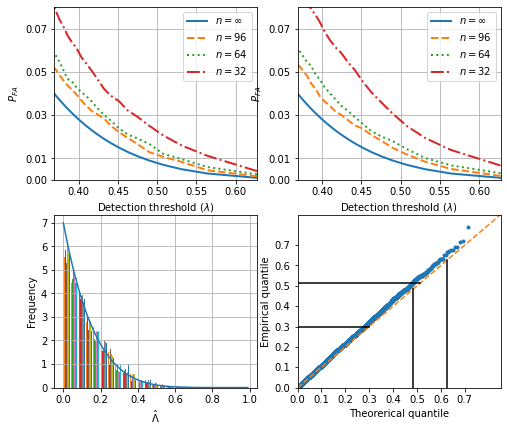

In [1]:
import numpy as np
import robustsp as rsp
import scipy
from scipy.stats.distributions import chi2

NR_ITER = 1000
p = 8 # dimension

# Matlab-like exp function for complex numbers
mExp = lambda c: np.exp(np.real(c))*\
        (np.cos(np.imag(c))\
         +1j*np.sin(np.imag(c)))

s = np.array([mExp(x) for x in 1j*np.arange(1,p+1)*np.pi]) # pulse of || p ||^2 = m

alpha = np.append(np.arange(0.001,0.04,0.002),0.04)

lam = 1 - alpha ** (1/(p-1)) # 1x21
nu = 0.5
nlist = [4*p, 8*p, 12*p] # number of secondary data
ntest = 10 # number of primary data

Pfa1 = np.zeros([len(nlist),len(alpha)])
Pfa2 = np.zeros([len(nlist),len(alpha)])

Lambda1 = np.zeros((NR_ITER,ntest)) # 10_000 x 10
Lambda2 = np.zeros((NR_ITER,ntest))

np.random.seed(123) # for reproducibility

####################
for kk in range(len(nlist)):
    n = nlist[kk]
    for it in range(NR_ITER):

        # Generate Covariance matrix
        l = np.random.uniform(0.1,1,p)

        # samples p number uniformly from [0.1,1[
        P = np.linalg.qr(np.random.rand(p,p)+
                        np.random.rand(p,p)*1j)[0] # the Q-matrix from QR decomposition
        # P is 8 x 8
        sig = p*P@np.diag(l/np.sum(l,axis=0))@P.conj().T 
        sig.ravel()[np.arange(0,p**2,p+1)] = \
                            np.real(sig.ravel()[np.arange(0,p**2,p+1)])
        sqrsig = scipy.linalg.sqrtm(sig) # 8 x 8

        # Generate the secondary data and compute the covariance
        x0 = sqrsig*np.sqrt(0.5)@(np.random.randn(p,n)+
                                1j*np.random.randn(p,n)) # ~ N_p(0,I)
        # 8 x 32
        x = np.sqrt(np.random.gamma(nu,1/nu,n)) * x0 

        hsig1,_,_,_ = rsp.Mscat(x.conj().T,'t-loss',0) # Tylers M-estimator, 8x8
        hsig2,_,_,_ = rsp.Mscat(x.conj().T,'Huber',0.8) # Hubers M-estimator, 8x8

        B1 = scipy.linalg.sqrtm(np.linalg.pinv(hsig1)) #8x8
        B2 = scipy.linalg.sqrtm(np.linalg.pinv(hsig2)) #8x8

        # Generate primary data from C K_v(0,sig)
        z0 = sqrsig * np.sqrt(0.5)@(np.random.randn(p,ntest)+
                                1j*np.random.randn(p,ntest)) # 8x10
        z = np.sqrt(np.random.gamma(nu,1/nu,ntest)) * z0 # 8x10

        # Compute the ADAPTIVE DETECTOR
        v1 = B1@z # 8x10
        q1 = B1@s[:,None] / scipy.linalg.norm(B1@s[:,None]) # 8x1

        v2 = B2@z
        q2 = B2@s[:,None] / scipy.linalg.norm(B2@s[:,None])

        v1 /= np.sqrt(np.sum(v1*np.conj(v1),axis=0))
        v2 /= np.sqrt(np.sum(v2*np.conj(v2),axis=0))

        Lambda1[it,:] = np.abs((v1.conj().T@q1).ravel())**2
        Lambda2[it,:] = np.abs((v2.conj().T@q2).ravel())**2


    for al in range(len(alpha)):
        Pfa1[kk,al] = np.sum(Lambda1[:]>lam[al])/(NR_ITER*ntest)
        Pfa2[kk,al] = np.sum(Lambda2[:]>lam[al])/(NR_ITER*ntest)

#################################

import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams["figure.figsize"] = [8, 7]
plt.subplot(2, 2, 1)

plt.plot(lam, alpha, '-', linewidth=2)
plt.axis([min(lam), max(lam), 0, 0.08])

plt.plot(lam, Pfa1[2,:], '--', linewidth=2)
plt.plot(lam, Pfa1[1,:], ':', linewidth=2)
plt.plot(lam, Pfa1[0,:], '-.', linewidth=2)

plt.yticks([0, 0.01, 0.03, 0.05, 0.07])
plt.ylabel('$P_{FA}$')
plt.xlabel('Detection threshold $(\lambda)$')

plt.legend(['$n=\infty$','$n=96$','$n=64$','$n=32$'])
plt.grid()

plt.subplot(2, 2, 2)

plt.plot(lam, alpha, '-', linewidth=2)
plt.axis([min(lam), max(lam), 0, 0.08])

plt.plot(lam, Pfa2[2,:], '--', linewidth=2)
plt.plot(lam, Pfa2[1,:], ':', linewidth=2)
plt.plot(lam, Pfa2[0,:], '-.', linewidth=2)

plt.yticks([0, 0.01, 0.03, 0.05, 0.07])
plt.ylabel('$P_{FA}$')
plt.xlabel('Detection threshold $(\lambda)$')

plt.legend(['$n=\infty$','$n=96$','$n=64$','$n=32$'])
plt.grid()

from scipy.stats import beta

plt.subplot(2, 2, 3)
xval= np.arange(0, 1, 0.01)
betapdf = beta.pdf(xval, 1, p-1).flatten()
plt.plot(xval, betapdf)

plt.hist(Lambda1, 20, density=True)
plt.grid()
plt.xlabel('$\hat \Lambda$')
plt.ylabel("Frequency")


plt.subplot(2,2,4)

lams = np.sort(Lambda1.flatten())
len_ = lams.size
pvals = (np.arange(0,len_) - 0.5)/len_ # n x 1
qvals = beta.ppf(pvals, 1, p-1)
q99 = beta.ppf(0.99,1,p-1)
q999 = beta.ppf(0.999,1,p-1)
e99 = lams[len_-1000-1]
e999 = lams[len_-100-1]

plt.plot(qvals, lams, '.', linewidth=1)
plt.plot([0,1 ], [0, 1], '--')
plt.axis([0, 0.85, 0, 0.85])
plt.yticks(np.arange(0,0.8,0.1))
plt.xticks(np.arange(0,0.8,0.1))
plt.ylabel('Empirical quantile')
plt.xlabel('Theorerical quantile')

plt.plot([q99, q99], [0, q99],'k-')
plt.plot([0, e99], [e99, e99],'k-')
plt.plot([q999, q999], [0, q999],'k-')
_ = plt.plot([0, e999], [e999, e999],'k-')

# 04 Robust Filtering

## EKF Time of Arrival Tracking

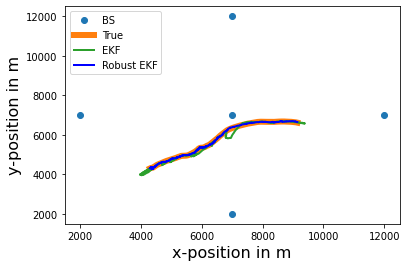

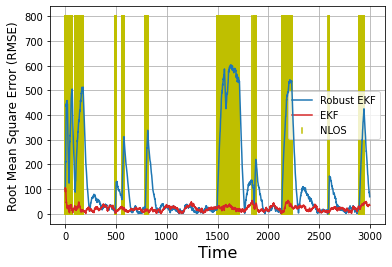

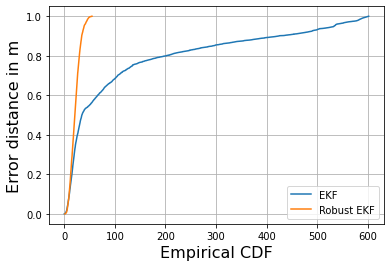

In [4]:


# Load parameters. The structs generated by set_parameters_book.m are
# loaded as Dictionaries
import scipy.io as sio
import numpy as np
import robustsp as rsp
from robustsp.RobustFiltering.examples.Auxiliary.create_environment_book import create_environment_book
from robustsp.RobustFiltering.examples.Auxiliary.set_parameters_book import *
import matplotlib.pyplot as plt

ekf_th = []
ekf_Hc = []
for ii in range(parameter['mc']):
    parameter['numbermc'] = ii

    # generate measurements
    parameter = create_environment_book(parameter,parameter['start'],parameter['sigma_v'])

    # generate random starting point
    randnvector = parameter['initial_sigma']*np.random.randn(4)
    theta_init  = parameter['start']+ randnvector

    # estimate positions using (robust) extended Kalman filter
    ekf_th.append(rsp.ekf_toa(parameter['MeasuredDistances'],theta_init,parameter['BS'],ekf)[0])
    ekf_Hc.append(rsp.ekf_toa_robust(parameter['MeasuredDistances'],theta_init,parameter['BS'],rekf)[0])

# Least-squares estimation
ekf_th_x = ekf_th[0][0,:]
ekf_th_y = ekf_th[0][1,:]

# Robust M-estimation
ekf_Hc_x = ekf_Hc[0][0,:]
ekf_Hc_y = ekf_Hc[0][1,:]


fig1 = plt.figure(0)
plt.plot(parameter['BS'][:,0],parameter['BS'][:,1],'o',lw=2, label='BS')
plt.plot(parameter['thx'], parameter['thy'],lw=6,label='True')
plt.plot(ekf_th_x, ekf_th_y, lw=2, label='EKF')
plt.plot(ekf_Hc_x, ekf_Hc_y, lw=2, label='Robust EKF',color='b')
plt.xlabel('x-position in m', size=16)
plt.ylabel('y-position in m', size=16)
plt.legend()

fig2 = plt.figure(1)
fig3 = plt.figure(2)

eval_ekf = rsp.eval_track(ekf_th, parameter, 'r', fig1,fig2,fig3)
eval_ekf_Hc = rsp.eval_track(ekf_Hc, parameter, 'b', fig1,fig2,fig3)
plt.show()



# 05 Dependent Data

## Examples for Bounded Innovation Propagation (BIP) MM ARMA parameter estimation

In [5]:
import numpy as np
import scipy.signal as sps
import robustsp as rsp
import matplotlib.pyplot as plt
import matplotlib

# Fix random number generator for reproducibility
np.random.seed(1) 

### Example 1: AR(1) with 30 percent isolated outliers

In [6]:
# Generate AR(1) observations
N = 300
a = np.random.randn(N)
x = sps.lfilter([1],[1,-.8],a)
p = 1
q = 0

Generate isolated Outliers

In [7]:
cont_prob = 0.3 # outlier contamination probability
outlier_ind =  np.where(np.sign(np.random.rand(N)-cont_prob)<0)# outlier index
outlier = 100*np.random.randn(N) # contaminating process
v = np.zeros(N) # additive outlier signal
v[outlier_ind] = outlier[outlier_ind]
v[0] = 0 # first sample should not be an outlier

x_ao = x+v # 30% of isolated additive outliers

BIP MM Estimation

In [8]:
result = rsp.arma_est_bip_mm(x_ao,p,q)

KeyboardInterrupt: ignored

In [ ]:
print('Example: AR(1) with ar_coeff = -0.8')
print('30% of isolated additive outliers')
print('estimaed coefficients: %.3f' % result['ar_coeffs'])

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [10, 10]

plt.subplot(2,1,1)
plt.plot(x_ao,'-',lw=2,label='outlier contaminated AR(1)')
plt.plot(result['cleaned_signal'],'-.',c='y',label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-AR(1) cleaned signal')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,lw=2,label='original AR(1)')
plt.plot(result['cleaned_signal'],'-.',label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-AR(1) cleaned signal')
plt.legend()
plt.show()

### Example 2: ARMA(1,1) with 10% patchy outliers

Generate ARMA(1,1) observations

In [ ]:
N = 1000
a = np.random.randn(N)
x = sps.lfilter([1, 0.2],[1, -.8],a)
p = 1
q = 1

Generate a patch of outliers of length 101 samples

In [ ]:
v = 1000*np.random.randn(101)

10% of patch additive outliers

In [ ]:
x_ao = np.array(x)
x_ao[99:200] += v

BIP-MM estimation

In [ ]:
result = rsp.arma_est_bip_mm(x_ao,p,q)

print('''Example 2: ARMA(1,1) with ar_coeff = -0.8, ma_coeff 0.2' \n
10 percent patchy additive outliers \n
estimated coefficients: \n
ar_coeff_est = %.3f \n
ma_coeff_est = %.3f''' %(result['ar_coeffs'],result['ma_coeffs']))

In [ ]:
plt.subplot(2,1,1)
plt.plot(x_ao,'-',lw=2,label='outlier contaminated AR(1)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-ARMA(1,1) cleaned signal')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,lw=2,label='original ARMA(1,1)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-ARMA(1,1) cleaned signal')
plt.legend()
plt.show()

### Example 3: MA(2) with 20 % isolated Outliers

Generate MA(2) observations

In [ ]:
N = 500
a = np.random.randn(N)
x = sps.lfilter([1,-.7,.5],[1],a)
p=0
q=2

Generate isolated Outliers

In [ ]:
cont_prob = 0.2
outlier_ind = np.where(np.sign(np.random.rand(N)-(cont_prob))<0)
outlier = 100*np.random.randn(N)
v = np.zeros(N)
v[outlier_ind] = outlier[outlier_ind]
v[:2] = 0

20 % of isolated additive Outliers

In [ ]:
x_ao = x+v

BIP MM estimation

In [ ]:
result = rsp.arma_est_bip_mm(x_ao,p,q)

In [ ]:
print('''Example 3: MA(2) ma_coeff [-0.7 0.5]' \n
20 % of isolated additive Outliers \n
estimated coefficients: \n
ma_coeff_est = ''',result['ma_coeffs'])

In [ ]:
plt.subplot(2,1,1)
plt.plot(x_ao,'-',lw=2,label='outlier contaminated AR(1)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-MA(2) cleaned signal')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,lw=2,label='original MA(2)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-MA(2) cleaned signal')
plt.legend()
plt.show()

## Examples for Bounded Innovation Propagation (BIP) S ARMA parameter estimation

Import libraries and fix seed of rng for reproducibility

In [ ]:
import numpy as np
import scipy.signal as sps
import robustsp as rsp
import matplotlib.pyplot as plt
import matplotlib

# Fix random number generator for reproducibility
np.random.seed(1)

meth = None

### Example 1: AR(1) with 30 percent isolated outliers

In [ ]:
# Generate AR(1) observations
N = 300
a = np.random.randn(N)
x = sps.lfilter([1],[1,-.8],a)
p = 1
q = 0

Generate isolated Outliers

In [ ]:
cont_prob = 0.3 # outlier contamination probability
outlier_ind =  np.where(np.sign(np.random.rand(N)-cont_prob)<0)# outlier index
outlier = 100*np.random.randn(N) # contaminating process
v = np.zeros(N) # additive outlier signal
v[outlier_ind] = outlier[outlier_ind]
v[0] = 0 # first sample should not be an outlier

x_ao = x+v # 30% of isolated additive outliers

BIP S Estimation

In [ ]:
result = rsp.arma_est_bip_s(x_ao,p,q,meth=meth)

Example: AR(1) with ar_coeff = -0.8
30% of isolated additive outliers
estimaed coefficients: -0.779


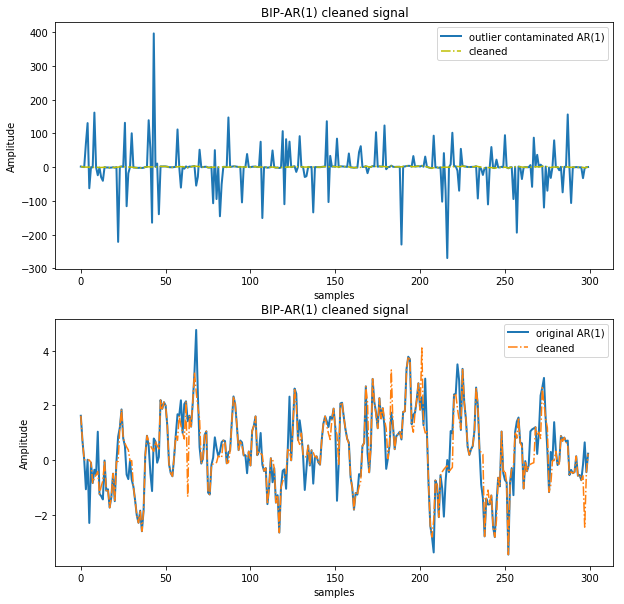

In [ ]:
result = rsp.arma_est_bip_s(x_ao,p,q,meth=meth)
print('Example: AR(1) with ar_coeff = -0.8')
print('30% of isolated additive outliers')
print('estimaed coefficients: %.3f' % result['ar_coeffs'])

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [10, 10]

plt.subplot(2,1,1)
plt.plot(x_ao,'-',lw=2,label='outlier contaminated AR(1)')
plt.plot(result['cleaned_signal'],'-.',c='y',label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-AR(1) cleaned signal')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,lw=2,label='original AR(1)')
plt.plot(result['cleaned_signal'],'-.',label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-AR(1) cleaned signal')
plt.legend()
plt.show()

### Example 2: ARMA(1,1) with 10% patchy outliers

Generate ARMA(1,1) observations

In [ ]:
N = 1000
a = np.random.randn(N)
x = sps.lfilter([1, 0.2],[1, -.8],a)
p = 1
q = 1

Generate a patch of outliers of length 101 samples

In [ ]:
v = 1000*np.random.randn(101)

10% of patch additive outliers

In [ ]:
x_ao = np.array(x)
x_ao[99:200] += v

BIP-MM estimation

In [ ]:
result = rsp.arma_est_bip_s(x_ao,p,q,meth=meth)

In [ ]:
result['ar_coeffs'],result['ma_coeffs']

(array([-0.82772776]), array([0.0247143]))

In [ ]:
result = rsp.arma_est_bip_s(x_ao,p,q,meth=meth)
print('''Example 2: ARMA(1,1) with ar_coeff = -0.8, ma_coeff 0.2' \n
10 percent patchy additive outliers \n
estimated coefficients: \n
ar_coeff_est = %.3f \n
ma_coeff_est = %.3f ''' %(result['ar_coeffs'],result['ma_coeffs']))

Example 2: ARMA(1,1) with ar_coeff = -0.8, ma_coeff 0.2' 

10 percent patchy additive outliers 

estimated coefficients: 

ar_coeff_est = -0.828 

ma_coeff_est = 0.025 


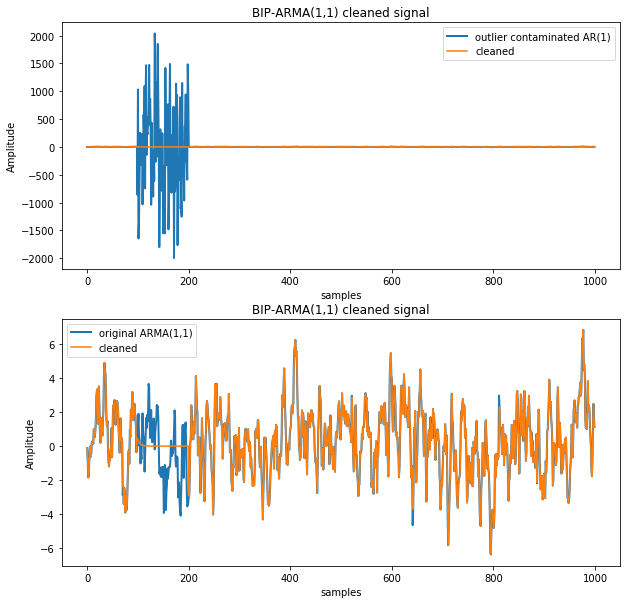

In [ ]:
plt.subplot(2,1,1)
plt.plot(x_ao,'-',lw=2,label='outlier contaminated AR(1)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-ARMA(1,1) cleaned signal')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,lw=2,label='original ARMA(1,1)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-ARMA(1,1) cleaned signal')
plt.legend()
plt.show()

### Example 3: MA(2) with 20 % isolated Outliers

Generate MA(2) observations

In [ ]:
N = 500
a = np.random.randn(N)
x = sps.lfilter([1,-.7,.5],[1],a)
p=0
q=2

Generate isolated Outliers

In [ ]:
cont_prob = 0.2
outlier_ind = np.where(np.sign(np.random.rand(N)-(cont_prob))<0)
outlier = 100*np.random.randn(N)
v = np.zeros(N)
v[outlier_ind] = outlier[outlier_ind]
v[:2] = 0

20 % of isolated additive Outliers

In [ ]:
x_ao = x+v

BIP S estimation

In [ ]:
result = rsp.arma_est_bip_s(x_ao,p,q,meth=meth)

In [ ]:
print('''Example 3: MA(2) ma_coeff [-0.7 0.5]' \n
20 % of isolated additive Outliers \n
estimated coefficients: \n
ma_coeff_est = ''',result['ma_coeffs'])

Example 3: MA(2) ma_coeff [-0.7 0.5]' 

20 % of isolated additive Outliers 

estimated coefficients: 

ma_coeff_est =  [ 0.64421346 -0.35589978]


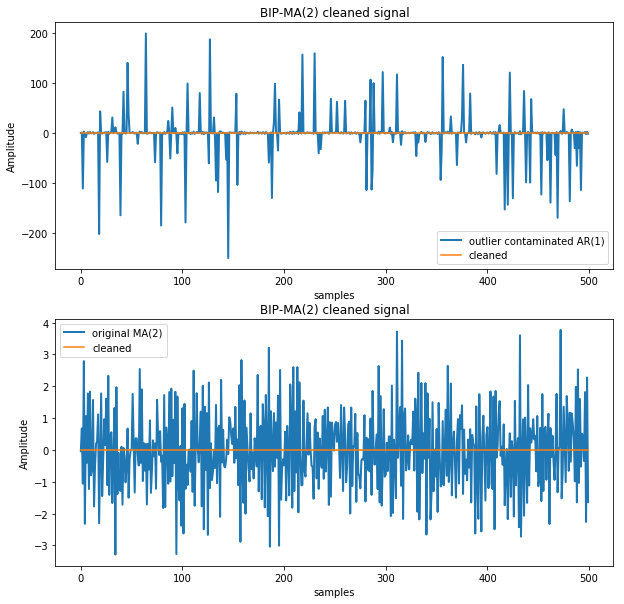

In [ ]:
plt.subplot(2,1,1)
plt.plot(x_ao,'-',lw=2,label='outlier contaminated AR(1)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-MA(2) cleaned signal')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,lw=2,label='original MA(2)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-MA(2) cleaned signal')
plt.legend()
plt.show()

## Examples for Bounded Innovation Propagation (BIP) Tau ARMA parameter estimation

In [ ]:
import numpy as np
import scipy.signal as sps
import robustsp as rsp
import matplotlib.pyplot as plt
import matplotlib

# Fix random number generator for reproducibility
np.random.seed(0) 

### Example 1: AR(1) with 30 percent isolated outliers

In [ ]:
# Generate AR(1) observations
N = 300
a = np.random.randn(N)
x = sps.lfilter([1],[1,-.8],a)
p = 1
q = 0

Generate isolated Outliers

In [ ]:
cont_prob = 0.3 # outlier contamination probability
outlier_ind =  np.where(np.sign(np.random.rand(N)-cont_prob)<0)# outlier index
outlier = 100*np.random.randn(N) # contaminating process
v = np.zeros(N) # additive outlier signal
v[outlier_ind] = outlier[outlier_ind]
v[0] = 0 # first sample should not be an outlier

x_ao = x+v # 30% of isolated additive outliers

BIP Tau Estimation

In [ ]:
result = rsp.arma_est_bip_tau(x_ao,p,q)

Example: AR(1) with ar_coeff = -0.8
30% of isolated additive outliers
estimaed coefficients: -0.822


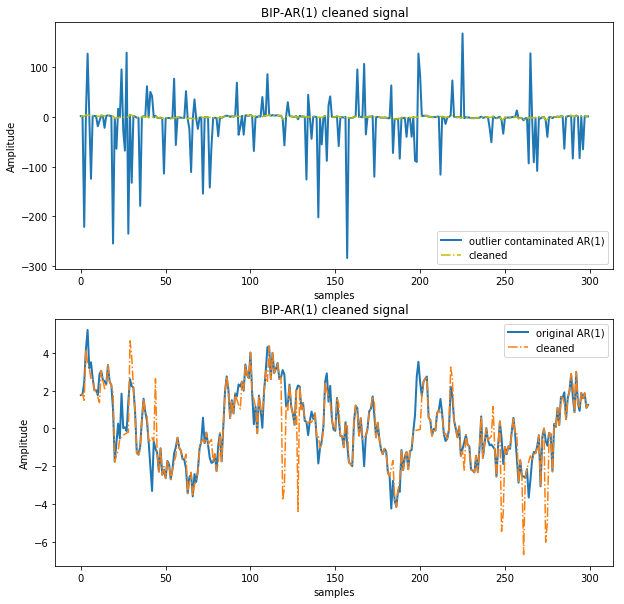

In [ ]:
result = rsp.arma_est_bip_tau(x_ao,p,q)
print('Example: AR(1) with ar_coeff = -0.8')
print('30% of isolated additive outliers')
print('estimaed coefficients: %.3f' % result['ar_coeffs'])

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [10, 10]

plt.subplot(2,1,1)
plt.plot(x_ao,'-',lw=2,label='outlier contaminated AR(1)')
plt.plot(result['cleaned_signal'],'-.',c='y',label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-AR(1) cleaned signal')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,lw=2,label='original AR(1)')
plt.plot(result['cleaned_signal'],'-.',label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-AR(1) cleaned signal')
plt.legend()
plt.show()

### Example 2: ARMA(1,1) with 10% patchy outliers

Generate ARMA(1,1) observations

In [ ]:
N = 1000
a = np.random.randn(N)
x = sps.lfilter([1, 0.2],[1, -.8],a)
p = 1
q = 1

Generate a patch of outliers of length 101 samples

In [ ]:
v = 1000*np.random.randn(101)

10% of patch additive outliers

In [ ]:
x_ao = np.array(x)
x_ao[99:200] += v

BIP Tau estimation

In [ ]:
result = rsp.arma_est_bip_tau(x_ao,p,q)

print('''Example 2: ARMA(1,1) with ar_coeff = -0.8, ma_coeff 0.2' \n
10 percent patchy additive outliers \n
estimated coefficients: \n
ar_coeff_est = %.3f \n
ma_coeff_est = %.3f''' %(result['ar_coeffs'],result['ma_coeffs']))

Example 2: ARMA(1,1) with ar_coeff = -0.8, ma_coeff 0.2' 

10 percent patchy additive outliers 

estimated coefficients: 

ar_coeff_est = -0.791 

ma_coeff_est = 0.227


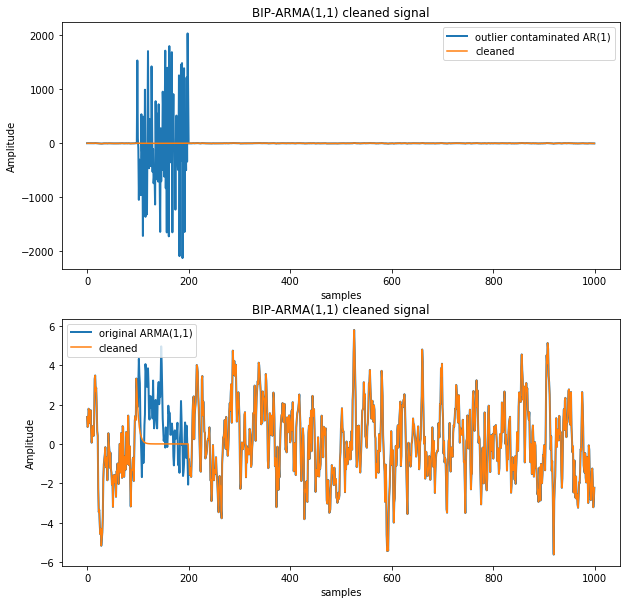

In [ ]:
plt.subplot(2,1,1)
plt.plot(x_ao,'-',lw=2,label='outlier contaminated AR(1)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-ARMA(1,1) cleaned signal')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,lw=2,label='original ARMA(1,1)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-ARMA(1,1) cleaned signal')
plt.legend()
plt.show()

### Example 3: MA(2) with 20 % isolated Outliers

Generate MA(2) observations

In [ ]:
N = 500
a = np.random.randn(N)
x = sps.lfilter([1,-.7,.5],[1],a)
p=0
q=2

Generate isolated Outliers

In [ ]:
cont_prob = 0.2
outlier_ind = np.where(np.sign(np.random.rand(N)-(cont_prob))<0)
outlier = 100*np.random.randn(N)
v = np.zeros(N)
v[outlier_ind] = outlier[outlier_ind]
v[:2] = 0

20 % of isolated additive Outliers

In [ ]:
x_ao = x+v

BIP Tau estimation

In [ ]:
result = rsp.arma_est_bip_tau(x_ao,p,q)

In [ ]:
print('''Example 3: MA(2) ma_coeff [-0.7 0.5]' \n
20 % of isolated additive Outliers \n
estimated coefficients: \n
ma_coeff_est = ''',result['ma_coeffs'])

Example 3: MA(2) ma_coeff [-0.7 0.5]' 

20 % of isolated additive Outliers 

estimated coefficients: 

ma_coeff_est =  [-0.54179401  0.37082019]


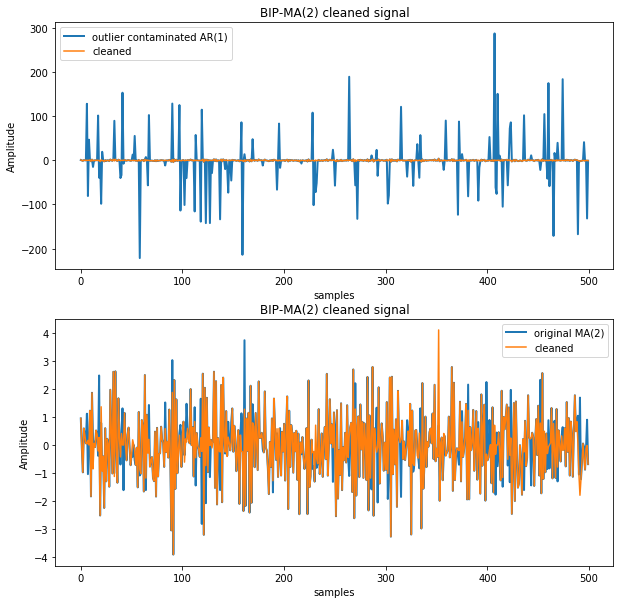

In [ ]:
plt.subplot(2,1,1)
plt.plot(x_ao,'-',lw=2,label='outlier contaminated AR(1)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-MA(2) cleaned signal')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,lw=2,label='original MA(2)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-MA(2) cleaned signal')
plt.legend()
plt.show()

## PPG BIP Tai

In [ ]:
import pkg_resources
import robustsp as rsp
import numpy as np
import matplotlib.pyplot as plt
import scipy
import matplotlib
%matplotlib inline
ecg_ppg_datapath = pkg_resources.resource_filename('robustsp', 'data/ECG-PPG_HRV_example.mat')

ppg_data = scipy.io.loadmat(ecg_ppg_datapath)

ecg_data = scipy.io.loadmat(ecg_ppg_datapath)

ppg_signal = ppg_data['ppg_signal'].flatten()

ecg_signal = ecg_data['ecg_signal'].flatten()

ppg_pos = ppg_data['ppg_pos'].flatten()

ecg_pos = ecg_data['ecg_pos'].flatten()

matplotlib.rcParams['figure.figsize'] = [10,10]

In [ ]:
t_ppg = np.linspace(0,len(ppg_signal),len(ppg_signal))

t_ecg = np.linspace(0,len(ecg_signal),len(ecg_signal))

Plot PPG and ECG (referece) Signals

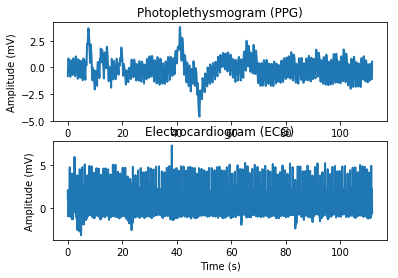

In [ ]:
plt.subplot(2,1,1)
plt.plot(t_ppg/1000,ppg_signal,lw=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('Photoplethysmogram (PPG)')

plt.subplot(2,1,2)
plt.plot(t_ecg/1000,ecg_signal,lw=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
a=plt.title('Electrocardiogram (ECG)')

Plot inter-beat-intervals

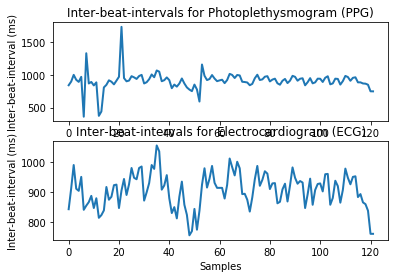

In [ ]:
ibi_ppg = np.diff(ppg_pos)

ibi_ecg = np.diff(ecg_pos)

plt.subplot(2,1,1)
plt.plot(ibi_ppg,lw=2)
plt.xlabel('Samples')
plt.ylabel('Inter-beat-interval (ms)')
plt.title('Inter-beat-intervals for Photoplethysmogram (PPG)')

plt.subplot(2,1,2)
plt.plot(ibi_ecg,lw=2)
plt.xlabel('Samples')
plt.ylabel('Inter-beat-interval (ms)')
_=plt.title('Inter-beat-intervals for Electrocardiogram (ECG)')

BIP-Tau Data Cleaning of PPG inter-beat-intervals


Selected ARMA model: MA(11)
estimated coefficients: 
 [ 0.71771025 -0.00949885  0.31573183  0.53740187  0.04330616 -0.0755072
  0.15075173 -0.00806568 -0.15228038  0.19088338  0.21311771]


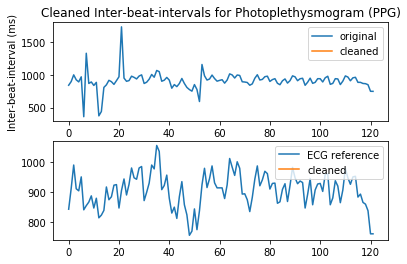

In [ ]:
#### Selected ARMA model

p = 0
q = 11

# BIP-ARMA parameter estimation and data cleaning

flipped_sig = ibi_ppg[::-1]-np.median(ibi_ppg)

result = rsp.arma_est_bip_tau(flipped_sig,p,q)

ibi_ppg_cl = result['cleaned_signal'][::-1]+np.median(ibi_ppg)

print("""
Selected ARMA model: MA(11)
estimated coefficients: 
""", result['ma_coeffs'])

plt.subplot(2,1,1)
plt.plot(ibi_ppg,label='original')
plt.plot(ibi_ppg_cl,label='cleaned')
plt.xlabel('Samples')
plt.ylabel('Inter-beat-interval (ms)')
plt.title('Cleaned Inter-beat-intervals for Photoplethysmogram (PPG)')
plt.legend()

plt.subplot(2,1,2)
plt.plot(ibi_ecg,label='ECG reference')
plt.plot(ibi_ppg_cl,label='cleaned')
plt.legend()
plt.show()

# Spectrum Estimation

## ARMA(4,3) by Moses et al with 2 percent additive outliers vs BIP tau estimate

In [ ]:
import numpy as np
import robustsp as rsp
import scipy.signal as sps
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize']=[10,10]

np.random.seed(0)

Generate Data

In [ ]:
N = 512

Example from Moses

In [ ]:
a = np.array([1, -1.316, 1.4401, -1.0919, 0.83527])

b_0 = 0.13137
b = np.array([0.13137, 0.023543, 0.10775, 0.03516])/b_0

p = 4
q = 3

w = np.linspace(0,np.pi,int(N/2)) 
s = np.exp(1j*w) 
H = np.polyval(b,s) / np.polyval(a,s)  

z = np.random.randn(N)
y = sps.lfilter(b,a,z)
x = np.array(y)

for jj in range(49,N,51):
    # 2 percent additive outliers
    y[jj] += 1000*np.random.randn(1)


Compute PSD estimates

In [ ]:
# Periodogram estimate
Pxx = np.abs(np.fft.fft(y))**2

# BIP Tau ARMA estimate

PxxdB_tau, Pxx_tau, w, sigma_hat = rsp.spec_arma_est_bip_tau(y,p,q)


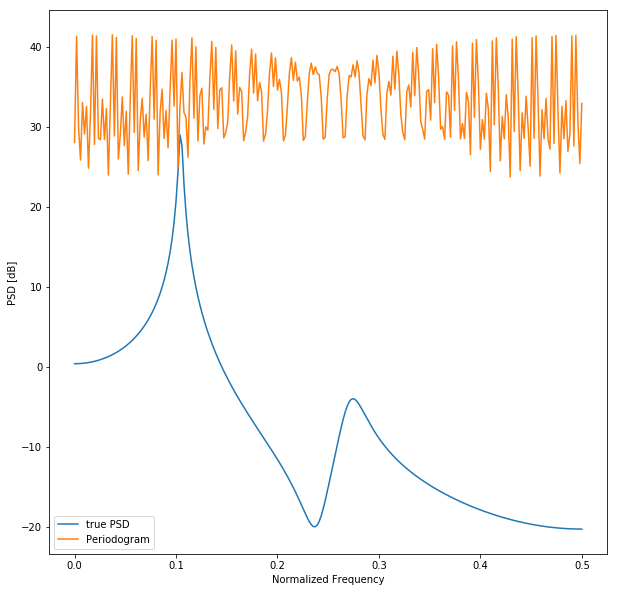

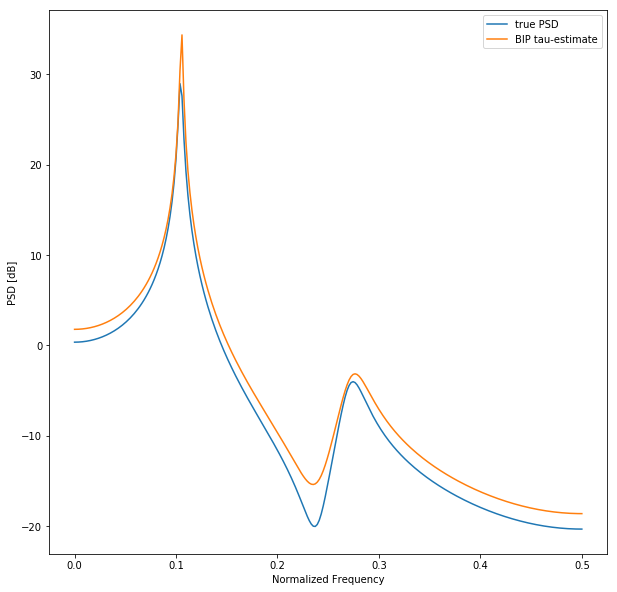

In [ ]:
plt.figure(0)
plt.plot(w/(2*np.pi), 10*np.log10(1/(2*np.pi) * np.abs(H)**2),label='true PSD')
plt.plot(w/(2*np.pi),10*np.log10(1/N/(2*np.pi)*Pxx[:int(N/2)]),label='Periodogram')
plt.xlabel('Normalized Frequency')
plt.ylabel('PSD [dB]')
plt.legend()

plt.figure(1)
plt.plot(w/(2*np.pi), 10*np.log10(1/(2*np.pi) * np.abs(H)**2),label='true PSD')
plt.plot(w/(2*np.pi),PxxdB_tau,label='BIP tau-estimate')
plt.xlabel('Normalized Frequency')
plt.ylabel('PSD [dB]')
_=plt.legend()